In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [ ]:
# to visualise all the columns and row in the data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
df = pd.read_excel("/content/telcom_data.xlsx")

In [ ]:
df.shape

(150001, 55)

In [ ]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.0,0.0,52.0,65.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,42376.0,41915.0,81230763.0,Apple,Apple iPhone 8 Plus (A1897),NaN,NaN,NaN,NaN,NaN,NaN,223.0,229.0,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.0,2.0,23.0,54.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,17264.0,16759.0,97970704.0,Apple,Apple iPhone Se (A1723),NaN,NaN,NaN,NaN,NaN,NaN,105.0,102.0,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.0,6.0,43.0,47.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,25003.0,28640.0,98249527.0,Apple,Apple iPhone Xs (A2097),NaN,NaN,NaN,NaN,NaN,NaN,104.0,108.0,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.0,5.0,34.0,37.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,13405.0,34088.0,97910631.0,Huawei,Huawei Fig-Lx1,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
150000,,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.795322e+06,32928.43438,5.750753e+06,2.056542e+06,1.791729e+06,467373.44194,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


In [ ]:
df.info

In [ ]:
df.dtypes

,0
Bearer Id,object
Start,datetime64[ns]
Start ms,float64
End,datetime64[ns]
End ms,float64
Dur. (ms),float64
IMSI,float64
MSISDN/Number,float64
IMEI,float64
Last Location Name,object


In [ ]:
df.describe()

,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000,150000.000000,150000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,2019-04-26 12:36:38.953740032,499.188200,2019-04-27 17:40:08.059673344,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
min,2019-04-04 12:01:18,0.000000,2019-04-24 22:59:58,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,2019-04-25 00:26:00.750000128,250.000000,2019-04-26 07:30:11.500000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,2019-04-26 08:51:24.500000,499.000000,2019-04-27 23:02:05,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,5.687300e+05,2.094950e+04,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.941949e+06,2.297330e+05,3.930450e+04,4.679350e+04,8.639998e+07,128.000000,52.000000,164.000000,8.000000,288.000000,8.000000

In [ ]:
df.describe(include='object')

,Bearer Id,Last Location Name,Handset Manufacturer,Handset Type
count,150001,148848,149429,149429
unique,134709,45547,170,1396
top,,D41377B,Apple,Huawei B528S-23A
freq,991,80,59565,19752


In [ ]:
df.isnull().sum()

,0
Bearer Id,0
Start,1
Start ms,1
End,1
End ms,1
Dur. (ms),1
IMSI,570
MSISDN/Number,1066
IMEI,572
Last Location Name,1153


In [ ]:
df.duplicated().sum()

0

In [ ]:
# data se Nan ko '0' se replace karna
df = df.fillna(0)


In [ ]:
# data ko forword fill
df = df.ffill()

In [ ]:
# backword fill
df = df.bfill()

In [ ]:
df = df.replace(np.nan, 0)

In [ ]:
## fillna data in the mode,mean
def get_categorical_and_numerical_columns(data):
  categoricals , numericals = [] , []
  for col in data.columns.tolist():
    if data[col].dtypes == "object":
      categoricals.append(col)
    else:
      numericals.append(col)

In [ ]:
for col in df.columns.tolist():
  if df[col].dtypes == "object":
    df[col] = df[col].fillna(df[col].mode()[0])
  else:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum()

,0
Bearer Id,0
Start,0
Start ms,0
End,0
End ms,0
Dur. (ms),0
IMSI,0
MSISDN/Number,0
IMEI,0
Last Location Name,0


In [ ]:
# data me categorical_columns ko dtypes change karna
for col in df.columns.tolist():
  if df[col].dtypes == "object":
    df[col] = df[col].astype("category")
    df[col] = df[col].cat.codes
    df[col] = df[col].astype("int64")
    df[col] = df[col].astype("object")
    df[col] = df[col].astype("category")



In [ ]:
df.dtypes

,0
Bearer Id,category
Start,category
Start ms,float64
End,category
End ms,float64
Dur. (ms),float64
IMSI,float64
MSISDN/Number,float64
IMEI,float64
Last Location Name,category


In [ ]:
import pandas as pd

# First, ensure 'Start' and 'End' columns are converted to datetime
df['Start'] = pd.to_datetime(df['Start'], errors='coerce')  # Convert to datetime
df['End'] = pd.to_datetime(df['End'], errors='coerce')      # Convert to datetime

# Now calculate the 'Duration' in seconds if both columns are successfully converted
if df['Start'].dtype == 'datetime64[ns]' and df['End'].dtype == 'datetime64[ns]':
    df['Duration'] = (df['End'] - df['Start']).dt.total_seconds()
    df['Duration'] = df['Duration'].astype(int)  # Convert duration to integer

    # Optionally, convert 'Start' and 'End' back to integers in seconds
    df['Start'] = df['Start'].view('int64') // 10**9  # Convert to seconds
    df['End'] = df['End'].view('int64') // 10**9      # Convert to seconds
else:
    print("Error: 'Start' or 'End' column is not in datetime format.")


In [ ]:
# Convert datetime to an integer representing seconds since epoch
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
df['Duration'] = (df['End'] - df['Start']).dt.total_seconds()
df['Duration'] = df['Duration'].astype(int)
df['Start'] = df['Start'].astype(int)
df['End'] = df['End'].astype(int)


In [ ]:
df.dtypes

,0
Bearer Id,category
Start,int64
Start ms,float64
End,int64
End ms,float64
Dur. (ms),float64
IMSI,float64
MSISDN/Number,float64
IMEI,float64
Last Location Name,category


In [ ]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

In [ ]:
categorical_columns

[]

In [ ]:
numerical_columns

['Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google

In [ ]:
## Check One hot encoder

from sklearn.preprocessing import OneHotEncoder

# Create sample data
data = pd.DataFrame({
    'Category':['Bearer Id', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']
})

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(data[['Category']])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Category']))

# Display the original and encoded data
print("Original Data:\n", data)
print("One-Hot Encoded Data:\n", encoded_df)


Original Data:
                Category
0             Bearer Id
1    Last Location Name
2  Handset Manufacturer
3          Handset Type
One-Hot Encoded Data:
    Category_Bearer Id  Category_Handset Manufacturer  Category_Handset Type  \
0                 1.0                            0.0                    0.0   
1                 0.0                            0.0                    0.0   
2                 0.0                            1.0                    0.0   
3                 0.0                            0.0                    1.0   

   Category_Last Location Name  
0                          0.0  
1                          1.0  
2                          0.0  
3                          0.0  


In [ ]:
 #labelencoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_cols = []
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [ ]:
# how to use lable encoder
df['Bearer Id'] = LabelEncoder().fit_transform(df['Bearer Id'])
df['Last Location Name'] = LabelEncoder().fit_transform(df['Last Location Name'])
df['Handset Manufacturer'] = LabelEncoder().fit_transform(df['Handset Manufacturer'])
df['Handset Type'] = LabelEncoder().fit_transform(df['Handset Type'])
df['IMSI'] = LabelEncoder().fit_transform(df['IMSI'])
df['MSISDN/Number'] = LabelEncoder().fit_transform(df['MSISDN/Number'])


In [ ]:
# check for unique number
df.nunique()

,0
Bearer Id,134709
Start,1
Start ms,1000
End,1
End ms,1000
Dur. (ms),89526
IMSI,107266
MSISDN/Number,106857
IMEI,107271
Last Location Name,45548


In [ ]:
df.count()

,0
Bearer Id,150001
Start,150001
Start ms,150001
End,150001
End ms,150001
Dur. (ms),150001
IMSI,150001
MSISDN/Number,150001
IMEI,150001
Last Location Name,150001


In [ ]:
df["Handset Manufacturer"].value_counts().values

array([59565, 40839, 34423,  8987,   980,   747,   572,   397,   342,
         285,   254,   220,   202,   191,   187,   159,   144,   143,
         123,   112,    54,    51,    50,    47,    47,    46,    43,
          41,    34,    32,    29,    25,    23,    23,    20,    20,
          19,    19,    18,    15,    14,    14,    12,    12,    12,
          11,    11,    11,    11,    11,    10,    10,     9,     8,
           8,     8,     8,     7,     7,     7,     7,     6,     6,
           6,     6,     6,     6,     5,     5,     5,     5,     5,
           5,     5,     5,     5,     5,     5,     4,     4,     4,
           4,     4,     4,     4,     4,     4,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     1,     1,
           1,     1,

In [ ]:
df["Handset Manufacturer"].value_counts().index

Index([  6, 104,  53, 170, 135, 158,   0, 161,  87,   9,
       ...
         4,  20, 136,  80,  58,  94, 110, 153,  78, 114],
      dtype='int64', name='Handset Manufacturer', length=171)

In [ ]:
df["Handset Type"].value_counts().values

array([19752,  9419,  9023, ...,     1,     1,     1])

In [ ]:
df["Handset Type"].value_counts().index

Index([ 317,   54,   50, 1396,   60,   74,   67,   79,  956,   76,
       ...
          5,    2, 1336,  503,  438, 1210, 1037, 1295,  269, 1051],
      dtype='int64', name='Handset Type', length=1397)

<Axes: xlabel='Handset Manufacturer'>

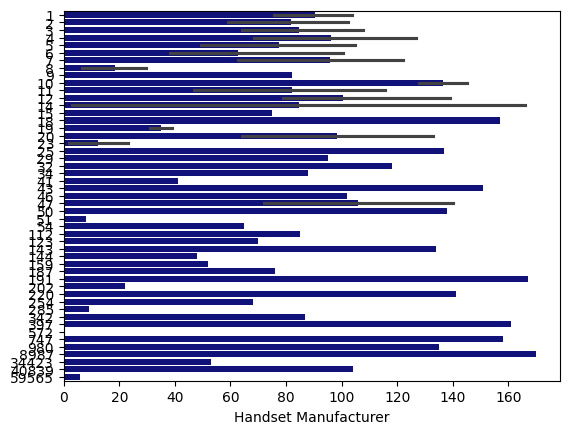

In [ ]:
# sns barplot
sns.barplot(x=df["Handset Manufacturer"].value_counts().index,
            y=df["Handset Manufacturer"].value_counts().values, color = "darkblue", orient = "h")

In [ ]:
# Model
X = df.drop('Handset Manufacturer', axis=1)
y = df['Handset Manufacturer']

In [ ]:
X.shape

(150001, 55)

In [ ]:
y.shape

(150001,)

In [ ]:
!pip install scikit-learn


In [ ]:
# Define the train and the test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120000, 55), (30001, 55), (120000,), (30001,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
df.dtypes

,0
Bearer Id,int64
Start,int64
Start ms,float64
End,int64
End ms,float64
Dur. (ms),float64
IMSI,int64
MSISDN/Number,int64
IMEI,float64
Last Location Name,int64


In [ ]:
import pandas as pd

# Example datetime64 series
df = pd.DataFrame({'date': pd.to_datetime(['2024-09-07', '2023-01-01'])})

# Convert datetime64 to an integer representing seconds since epoch
df['timestamp'] = df['date'].view('int64') // 10**9  # Convert nanoseconds to seconds

print(df)


        date   timestamp
0 2024-09-07  1725667200
1 2023-01-01  1672531200


In [ ]:
df.dtypes

,0
date,datetime64[ns]
timestamp,int64


In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
import pandas as pd

# Assuming 'Start' and 'End' columns are already in datetime format
df['Start'] = pd.to_datetime(df['Start'], errors='coerce')  # Convert to datetime
df['End'] = pd.to_datetime(df['End'], errors='coerce')      # Convert to datetime

# Ensure both columns are in datetime format
if df['Start'].dtype == 'datetime64[ns]' and df['End'].dtype == 'datetime64[ns]':
    # Calculate duration in seconds
    df['Duration'] = (df['End'] - df['Start']).dt.total_seconds()
    df['Duration'] = df['Duration'].astype(int)  # Convert duration to integer

    # Convert 'Start' and 'End' datetime columns to integers (in seconds)
    df['Start'] = df['Start'].astype('int64') // 10**9  # Convert to seconds
    df['End'] = df['End'].astype('int64') // 10**9      # Convert to seconds
else:
    print("Error: 'Start' or 'End' column is not in datetime format.")

Error: 'Start' or 'End' column is not in datetime format.


In [ ]:
# Making predictions
predictions = model.predict(X_test)

In [ ]:
predictions

array([  6,   6,   6, ...,   6, 104,   6])

In [ ]:
y_test.values

array([  6,   6,   6, ...,   6, 104,   6])

In [ ]:
# Checking the accruacy of the model
from sklearn.metrics import accuracy_score
print(f"The accuracy of the logistic regression model is : {accuracy_score(predictions,y_test)*100}%", )

The accuracy of the logistic regression model is : 97.56341455284824%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       115
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           6       1.00      0.99      1.00     12049
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.14      0.17      0.15        47
          10       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.37      0.37      0.37        41
          23       0.14      0.20      0.17         5
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         0
          30       0.00    

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For regression tasks
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')


MSE: 13.038532048931703
MAE: 0.4761507949735009
R²: 0.9950019477119147


In [ ]:
print(type(y_test))
print(type(predictions))
print(y_test[:5])
print(predictions[:5])

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
24815       6
22282       6
14236       6
138211     53
72452     170
Name: Handset Manufacturer, dtype: int64
[  6   6   6  53 170]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()  # Change to a regressor if continuous target
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# Making predictions
predictions = model.predict(X_test)

In [ ]:
predictions

array([  6.,   6.,   6., ...,   6., 104.,   6.])

In [ ]:
y_test.values

array([  6,   6,   6, ...,   6, 104,   6])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For regression tasks
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')


MSE: 0.01589986000466653
MAE: 0.00652411586280458
R²: 0.9999939051166666


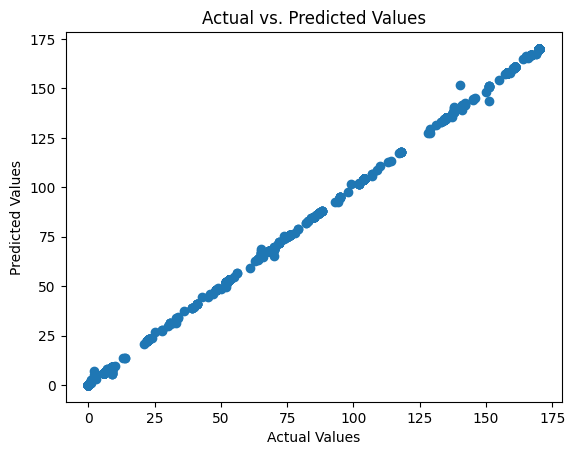

In [ ]:
# scttar plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

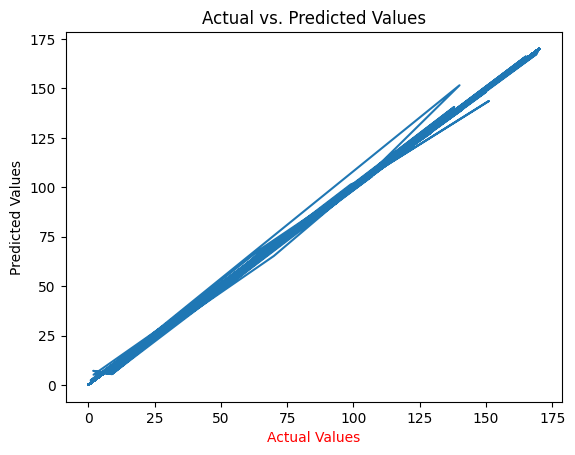

In [ ]:
# 2D plot
plt.plot(y_test, predictions)
plt.xlabel(('Actual Values'), color = "red")
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

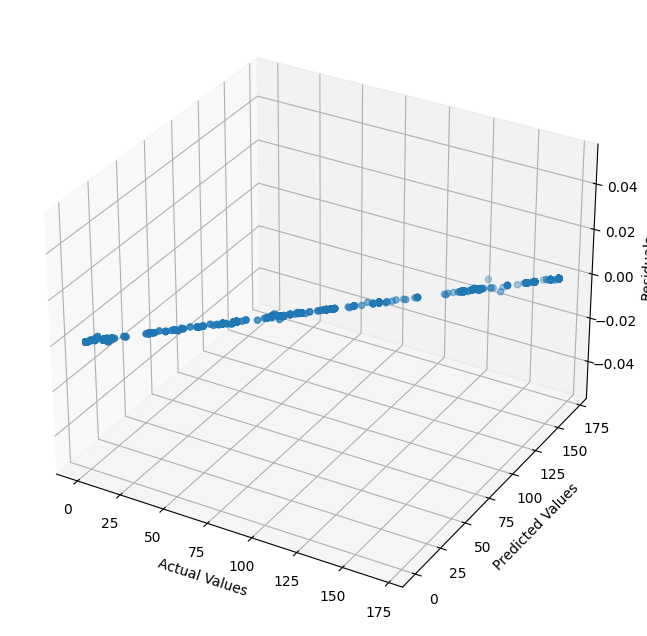

In [ ]:
# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_test, predictions)
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Residuals')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# function to calculate RMSE using cross-validation
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    return rmse

In [ ]:
#function to the evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

In [ ]:
# Dataframe to store all results
results = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'R2'])


In [ ]:
# Iterate through each regressar, fit the model,make predicitions,and evaluate
print (f"MSE: {mse:.2f}")

MSE: 0.02


In [ ]:
print (f"MAE: {mae:.2f}")


MAE: 0.01


In [ ]:
print (f"R2: {r2:.2f}")

R2: 1.00


In [ ]:
df.drop_duplicates()

Cluster labels (k0, k1): [0 0 0 1 1 1]
Centroid coordinates: [[1. 2.]
 [4. 2.]]


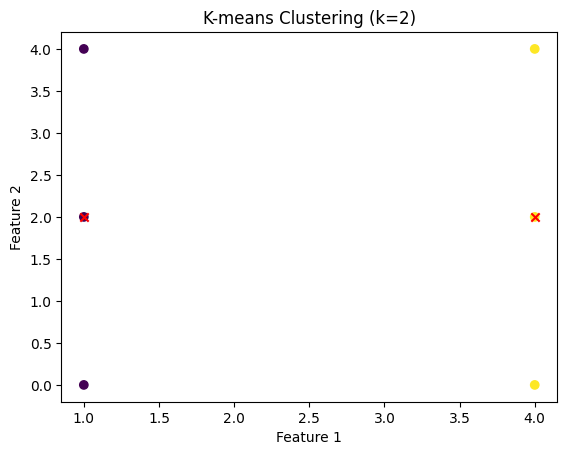

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Example dataset
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

# Initialize KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster assignments (k0 or k1)
labels = kmeans.labels_

# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_

# Print the results
print("Cluster labels (k0, k1):", labels)
print("Centroid coordinates:", centroids)

# Plot the data and the centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('K-means Clustering (k=2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
df['Avg RTT'] = (df['Avg RTT DL (ms)']+df['Avg RTT UL (ms)'])/2

In [ ]:
df['Avg RTT']

In [ ]:
df['Avg RTT DL (ms)']= (df['Avg RTT DL (ms)']-df['Avg RTT DL (ms)'].mean())/df['Avg RTT DL (ms)'].std()

KeyError: 'Avg RTT DL (ms)'

In [ ]:
df['Avg RTT DL (ms)']

In [ ]:
df['Avg RTT'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']
df['Avg RTT']

In [ ]:
# Calculate average TCP retransmission, RTT, and throughput
df['Avg TCP Retransmissions'] = (df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']) / 2

In [ ]:
df['Avg TCP Retransmissions']

In [ ]:
# Extract the engagement and experience scores
# Create a 2D array of engagement and experience scores
engagement_experience = np.column_stack((engagement_scores, experience_scores))
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(engagement_experience)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Cluster labels (k0, k1):", labels)
print("Centroid coordinates:", centroids)



In [ ]:
plt.scatter(engagement_scores, experience_scores, c=labels, cmap='viridis', marker='o')  # corrected line
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('K-means Clustering (k=2)')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.show()

In [ ]:
# centroids ko cross se dekhaya hai